# Que tal ahora LSTM (Long-Short Term Memory)

## Code Structure:
Here's a simplified example of using Keras (a high-level neural networks API) to create an LSTM model and perform time series forecasting in Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("EEZ_Fishing_Hours.xlsx",parse_dates=True)

In [3]:
data["label"].unique()

array(['Fiji', 'Micronesia', 'Gilbert Islands', 'Line Group',
       'Phoenix Group', 'Marshall Islands', 'Nauru', 'Palau',
       'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Samoa'], dtype=object)

In [4]:
data["ym"],data["date"]=pd.to_datetime(data["ym"]),pd.to_datetime(data["date"])

In [5]:
Micronesia=data[data["label"]=="Micronesia"]

In [6]:
Micronesia

,Unnamed: 0,date,ym,geartype,hours,vesselIDs,iso3,label
299,299,2015-01-01,2015-01-01,drifting_longlines,5503.613333,16,FSM,Micronesia
300,300,2015-01-01,2015-01-01,pole_and_line,1342.647500,9,FSM,Micronesia
301,301,2015-01-01,2015-01-01,tuna_purse_seines,1268.013889,38,FSM,Micronesia
302,302,2015-02-01,2015-02-01,drifting_longlines,5129.236111,13,FSM,Micronesia
303,303,2015-02-01,2015-02-01,pole_and_line,817.969167,12,FSM,Micronesia
...,...,...,...,...,...,...,...,...
647,647,2023-09-01,2023-09-01,fishing,20.634444,1,FSM,Micronesia
648,648,2023-09-01,2023-09-01,tuna_purse_seines,220.361667,9,FSM,Micronesia
649,649,2023-10-01,2023-10-01,drifting_longlines,4774.435000,20,FSM,Micronesia
650,650,2023-10-01,2023-10-01,fishing,17.611944,1,FSM,Micronesia


In [7]:
Micronesia=Micronesia.set_index("date")

In [8]:
y=Micronesia["hours"]

In [9]:
# Decompose the time series
y=y.resample("M").sum()
# The term bfill means that we use the value before filling in missing values
y=y.fillna(method='ffill')

<AxesSubplot: xlabel='date'>

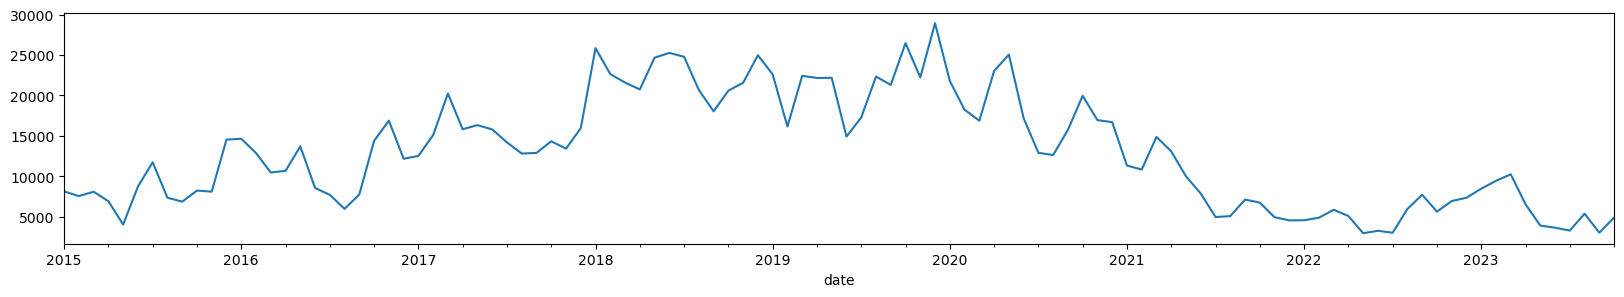

In [10]:
y.plot(figsize=(20,3))

In [11]:
raw_seq=np.array(y.values)

In [12]:
raw_seq

array([ 8114.27472222,  7541.95833333,  8076.09833333,  6905.52388889,
        4013.30805556,  8712.61666667, 11724.41805556,  7337.28055556,
        6853.87888889,  8219.83083333,  8089.27416667, 14527.58805556,
       14639.18888889, 12862.17277778, 10461.9225    , 10662.39      ,
       13692.60777778,  8543.21333333,  7695.95      ,  5960.02944444,
        7747.01194444, 14374.02361111, 16871.78555556, 12162.32611111,
       12508.54805556, 15093.72416667, 20226.19055556, 15809.62916667,
       16319.40361111, 15787.24111111, 14191.53083333, 12803.39833333,
       12880.15555556, 14321.20055556, 13410.85111111, 15939.96527778,
       25848.70583333, 22633.83277778, 21591.65777778, 20734.20916667,
       24671.12388889, 25254.79916667, 24782.33138889, 20658.11916667,
       18038.70833333, 20586.22944444, 21566.69305556, 24974.        ,
       22595.2275    , 16150.30027778, 22417.02916667, 22159.495     ,
       22175.14694444, 14911.34055556, 17266.90722222, 22331.03805556,
      

# 1. Data Preparation
## univariate data preparation

In [13]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[8114.27472222 7541.95833333 8076.09833333] 6905.52388888888
[7541.95833333 8076.09833333 6905.52388889] 4013.308055555558
[8076.09833333 6905.52388889 4013.30805556] 8712.61666666666
[6905.52388889 4013.30805556 8712.61666667] 11724.41805555556
[ 4013.30805556  8712.61666667 11724.41805556] 7337.28055555553
[ 8712.61666667 11724.41805556  7337.28055556] 6853.878888888886
[11724.41805556  7337.28055556  6853.87888889] 8219.830833333317
[7337.28055556 6853.87888889 8219.83083333] 8089.274166666651
[6853.87888889 8219.83083333 8089.27416667] 14527.58805555548
[ 8219.83083333  8089.27416667 14527.58805556] 14639.18888888882
[ 8089.27416667 14527.58805556 14639.18888889] 12862.17277777775
[14527.58805556 14639.18888889 12862.17277778] 10461.92249999998
[14639.18888889 12862.17277778 10461.9225    ] 10662.39
[12862.17277778 10461.9225     10662.39      ] 13692.607777777686
[10461.9225     10662.39       13692.60777778] 8543.213333333342
[10662.39       13692.60777778  8543.21333333] 7695.94

# 2. Vanilla LSTM
A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

We can define a Vanilla LSTM for univariate time series forecasting as follows.

In [14]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

2023-11-11 06:28:31.049454: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-11 06:28:31.050867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 06:28:31.074656: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 06:28:31.074682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 06:28:31.074699: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [15]:
# demonstrate prediction
x_input = array(raw_seq[-4:-1])
print(x_input)
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])
print(raw_seq[-1])

[3271.79083333 5363.33       3011.92222222]
3257.3071
4887.41638888888


Hay algunos otros algoritmos que pueden ser usados para datos univariados o para datos multivariados: https://www.kaggle.com/code/ritesh7355/develop-lstm-models-for-time-series-forecasting, y también en el original: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecastings/

In [41]:
train,validation=raw_seq[:-10],raw_seq[-10:]

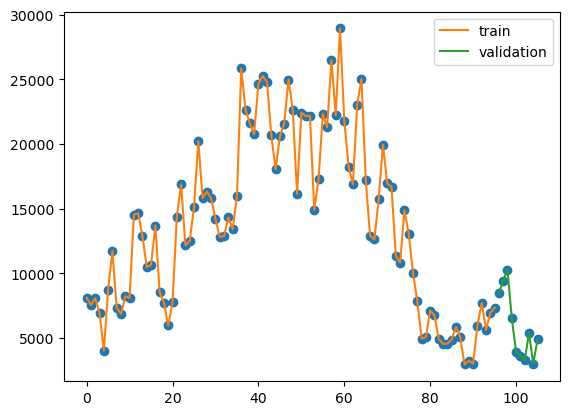

In [42]:
plt.plot(raw_seq,marker="o",lw=0)
plt.plot(range(0,len(train),1),train,label="train")
plt.plot(range(len(train),len(raw_seq),1),validation,label="validation")
plt.legend()
plt.show()

In [43]:
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [44]:
# Last 10 terms of your sequence for prediction
last_sequence = raw_seq[-n_steps:]  # Assuming `n_steps` is the number of steps for each sequence

# Predict the next 10 terms sequentially
predicted_sequence = []
for _ in range(10):
    # Reshape the last sequence for model input
    x_input = last_sequence[-n_steps:]
    x_input = x_input.reshape((1, n_steps, n_features))  # Assuming `n_features` is the number of features

    # Get the prediction for the next term
    yhat = model.predict(x_input, verbose=0)
    
    # Append the prediction to the predicted sequence
    predicted_sequence.append(yhat[0,0])  # Assuming the output shape is (1, 1)
    
    # Update the last sequence with the new prediction for the next iteration
    last_sequence = np.append(last_sequence, yhat[0,0])

# Print or use the predicted sequence for comparison
print("Predicted Sequence:", predicted_sequence)

Predicted Sequence: [5366.4565, 6551.446, 5857.9355, 5408.9385, 4350.547, 5285.6333, 5003.991, 5079.3022, 5345.7666, 6283.823]


In [45]:
validation

array([ 8452.16694444,  9431.54666667, 10228.98972222,  6528.695     ,
        3892.83777778,  3630.15138889,  3271.79083333,  5363.33      ,
        3011.92222222,  4887.41638889])

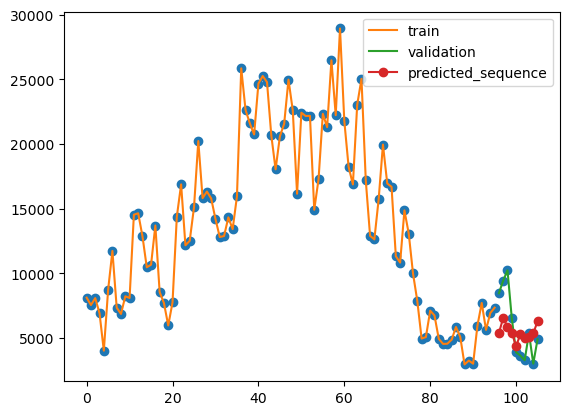

In [48]:
plt.plot(raw_seq,marker="o",lw=0)
plt.plot(range(0,len(train),1),train,label="train")
plt.plot(range(len(train),len(raw_seq),1),validation,label="validation")
plt.plot(range(len(train),len(raw_seq),1),predicted_sequence,label="predicted_sequence",marker="o")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predicted_sequence,validation))

2271.66565615215